# IEA Global EV Data (2010-2024) - RandomForest Regression Analysis

We will analyze the IEA Global EV dataset using a **supervised learning** approach.
Since we are predicting a continuous numerical value (in our dataset `value`), this is a **regression problem**.
We will go through the following steps:
- Algorithm Selection - RandomForest Regression
- Model Training
- Model Evaluation

## Importing Required Libraries
We first import all the necessary Python libraries for data handling, visualization, and machine learning.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score

## Loading the Dataset
We now load the **IEA Global EV Data 2024** CSV file and display the first few rows.

In [2]:
df = pd.read_csv('IEA Global EV Data 2024.csv')
df.head()

,region,category,parameter,mode,powertrain,year,unit,value
0,Australia,Historical,EV stock share,Cars,EV,2011,percent,0.00039
1,Australia,Historical,EV sales share,Cars,EV,2011,percent,0.00650
2,Australia,Historical,EV sales,Cars,BEV,2011,Vehicles,49.00000
3,Australia,Historical,EV stock,Cars,BEV,2011,Vehicles,49.00000
4,Australia,Historical,EV stock,Cars,BEV,2012,Vehicles,220.00000


To check with null values in the dataset

In [3]:
df.isnull().sum()

region        0
category      0
parameter     0
mode          0
powertrain    0
year          0
unit          0
value         0
dtype: int64

To check with duplicates in the dataset and drop them to get accurate results

In [4]:
df.drop_duplicates()

,region,category,parameter,mode,powertrain,year,unit,value
0,Australia,Historical,EV stock share,Cars,EV,2011,percent,3.900000e-04
1,Australia,Historical,EV sales share,Cars,EV,2011,percent,6.500000e-03
2,Australia,Historical,EV sales,Cars,BEV,2011,Vehicles,4.900000e+01
3,Australia,Historical,EV stock,Cars,BEV,2011,Vehicles,4.900000e+01
4,Australia,Historical,EV stock,Cars,BEV,2012,Vehicles,2.200000e+02
...,...,...,...,...,...,...,...,...
12649,World,Projection-STEPS,EV sales share,Cars,EV,2035,percent,5.500000e+01
12650,World,Projection-STEPS,EV stock share,Cars,EV,2035,percent,3.100000e+01
12651,World,Projection-APS,EV charging points,EV,Publicly available fast,2035,charging points,9.400000e+06
12652,World,Projection-APS,EV charging points,EV,Publicly available slow,2035,charging points,1.500000e+07


# Defining dependent(y) and independent(X) variables

As we can see, our dataset has more of strings categorical features than numerical columns. We can take help of **RandomForest regression** in this condition and also apply **One-hot encoding** to those categorical features.

In [5]:
X = df.drop(columns=['value'])
X = pd.get_dummies(X, drop_first=True)  # One-hot encode categorical variables
y = df['value']

## Data Splitting
We split the dataset into **Training (80%)** and **Testing (20%)** subsets.

In [6]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

## Algorithm Selection
Since this is a regression problem, we select the **RandomForestRegressor** algorithm & assign it to the variable **model**.

In [7]:
model = RandomForestRegressor(n_estimators=200, max_depth=15, random_state=42)

## Model Training
We fit only training data to our RandomForest regression model.

In [8]:
model.fit(X_train, y_train)

,n_estimators,200
,criterion,'squared_error'
,max_depth,15
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,1.0
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,bootstrap,True
,oob_score,False


## Model Evaluation
We give random data to our RandomForest Regression model to do prediction.

In [9]:
y_pred = model.predict(X_test)

We evaluate the model using two metrics:
- **Mean Squared Error (MSE)** - Actual difference between the predicted and the original value
- **R² Score** (Goodness of Fit) - Percentage of how accurate the model is predicting

In [10]:
# Evaluation Metrics
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Squared Error (MSE): {mse:.4e}")
print(f'R² Score: {r2}')

Mean Squared Error (MSE): 1.3596e+13
R² Score: 0.8381732097178298


Additionally, we plot a **scatter chart of Global EV data prediction using RandomForest regression** to visualize performance.

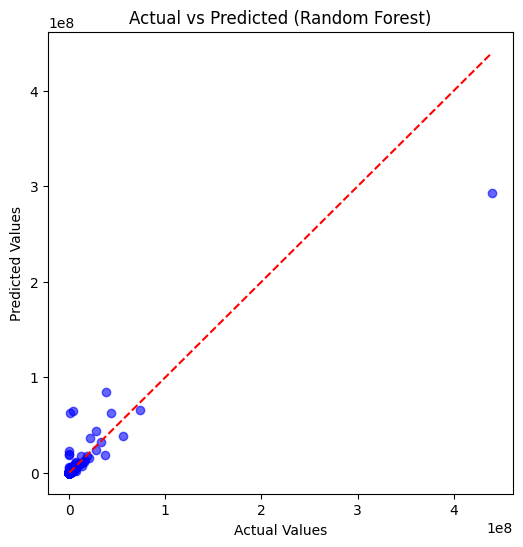

In [11]:
plt.figure(figsize=(6,6))
plt.scatter(y_test, y_pred, alpha=0.6, color="blue")
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], "r--")
plt.xlabel("Actual Values")
plt.ylabel("Predicted Values")
plt.title("Actual vs Predicted (Random Forest)")
plt.show()